<a href="https://colab.research.google.com/github/AhmedNasserabdelkareem/Binary_Classification_Problem/blob/master/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Reading Data

In [4]:
!git clone https://github.com/AhmedNasserabdelkareem/Binary_Classification_Problem.git

Cloning into 'Binary_Classification_Problem'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 0), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [6]:
cd Binary_Classification_Problem

/content/Binary_Classification_Problem


In [7]:
def reading_data(filename):
  raw_data= []
  with open(filename) as f:
      data = [line.split() for line in f]
  for row in data:
    raw_data.append(str(row[0]).strip().split(';'))
  df = pd.DataFrame(raw_data[1:], columns=raw_data[0])
  return df

In [8]:
train_df = reading_data('data/training.csv')
test_df = reading_data('data/validation.csv')
train_y = train_df['"classLabel"']
test_y = test_df['"classLabel"']
train_df = train_df.drop(columns=['"classLabel"'])
test_df = test_df.drop(columns=['"classLabel"'])

In [9]:
categorial_features=[]
numberical_feature= []
for col in train_df.columns:
  tmp = train_df[col].unique()
  types=[]
  for i in tmp:
    if any(char.isdigit() for char in i):
      types.append(True)
    else:
      types.append(False)
  if max(types) == True:
    numberical_feature.append(col)
  else:
    categorial_features.append(col)

# data cleansing

In [10]:
for col in train_df.columns:
  print(col,len(train_df.loc[train_df[col]== 'NA'].values))

"variable1" 39
"variable2" 39
"variable3" 0
"variable4" 64
"variable5" 64
"variable6" 66
"variable7" 66
"variable8" 0
"variable9" 0
"variable10" 0
"variable11" 0
"variable12" 0
"variable13" 0
"variable14" 100
"variable15" 0
"variable17" 100
"variable18" 2145
"variable19" 0


In [11]:
#Most of varibale18 columns is null so we can drop it
train_df = train_df.drop(columns=['"variable18"'])
test_df = test_df.drop(columns=['"variable18"'])
categorial_features.remove('"variable18"')

In [12]:
def reformat_numerical(x):
  if x != 'NA':
    return float(str(x.replace(",",".")))
  else:
    return np.NaN

In [13]:
def reformat_categorial(x):
  if x == 'NA':
    return np.NaN
  else:
    return x

In [14]:
for col in train_df.columns:
  if col in numberical_feature:
    train_df[col] =train_df[col].apply(reformat_numerical)
    test_df[col] =test_df[col].apply(reformat_numerical)
  else:
    train_df[col] =train_df[col].apply(reformat_categorial)
    test_df[col] =test_df[col].apply(reformat_categorial)


In [15]:
def convert_class_label(data):
  for i in range(0,len(data)):
    if data[i] == '"yes."':
      data[i] = 1
    else:
      data[i] = 0

In [16]:
convert_class_label(train_y)
convert_class_label(test_y)

# Handling missing data

Now we will replace missing data of numerical features with mean of column

In [17]:
train_df.fillna((train_df.mean()), inplace=True)
test_df.fillna((test_df.mean()), inplace=True)

Now we will replace missing data of categorial features with most common value of column

In [18]:
# the number of missing data in categorial features is small, So we can replace it with the most frequent value
train_df.fillna(train_df.mode().iloc[0],inplace=True)
test_df.fillna(test_df.mode().iloc[0],inplace=True)

# Handling Categorial Data

In [19]:
def categorial_to_classes(data):
  for col in categorial_features:
    labels = col+data[col].value_counts().index
    one_hot = pd.get_dummies(data[col])
    one_hot.columns = labels
    data = data.drop(col,axis = 1)
    data = pd.concat([data,one_hot],axis=1)
  return data

In [20]:
train_df = categorial_to_classes(train_df)
test_df = categorial_to_classes(test_df)

# Normalizing

In [ ]:
def normalize(data):
  s = StandardScaler()
  numerical_data_df = data[[i for i in numberical_feature]]
  data = data.drop([i for i in numberical_feature],axis=1)
  normalized = s.fit_transform(numerical_data_df)
  normalizedData = pd.DataFrame(data = normalized,columns=numerical_data_df.columns)
  data = pd.concat([normalizedData,data],axis=1)
  return data

In [ ]:
train_df = normalize(train_df)
test_df = normalize(test_df)

In [ ]:
for i in train_df.columns:
  if i not in test_df.columns:
    tmp = pd.DataFrame([0]*test_df.shape[0],columns=[i])
    test_df= pd.concat([test_df,tmp],axis=1)

In [ ]:
test_df = test_df.reindex(train_df.columns, axis=1)

# Model

First split data to make cross validation data and test the model against it.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df,train_y.astype(int),test_size = 0.9,random_state = 20)

In [ ]:
log = LogisticRegression()
log.fit(X_train,y_train)
print("Accuracy of the model: ",log.score(X_test,y_test))

Accuracy of the model:  1.0


In [ ]:
log.coef_

array([[-1.57397983e-01,  2.00129953e-01,  1.23927352e-01,
         1.54459504e-01,  1.92512279e-02,  1.05710194e-01,
         1.92512279e-02,  2.34925419e+00,  3.60659772e-02,
        -3.60676155e-02,  1.78844646e-03,  1.01096933e-01,
        -1.02887017e-01,  1.01096933e-01,  1.78844646e-03,
        -1.02887017e-01, -1.29259709e-02,  1.28201919e-02,
         5.77421404e-02,  2.17947644e-02,  2.16666938e-02,
         2.26054391e-02, -8.48027206e-02, -1.16727538e-01,
        -1.73943336e-02, -6.13325121e-03, -9.49880973e-03,
         5.55826698e-02,  3.47015040e-03,  5.17989360e-02,
        -3.43999273e-02,  0.00000000e+00, -8.39351925e-02,
         8.12549438e-02,  2.72048159e-03,  4.93618440e-03,
         1.78844646e-03,  2.29222225e-02,  4.71120268e-03,
        -3.13245185e-01,  3.13243547e-01, -9.06165874e-02,
         9.06149491e-02, -5.13973400e-02,  5.13957016e-02,
        -3.27616133e-02,  3.80021068e-02, -5.24213186e-03]])

In [ ]:
print("Accuracy of the model against test_data: ",logistic_regression.score(test_df.to_numpy(),test_y.astype(int)))

Accuracy of the model against test_data:  0.465


# Outliers

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

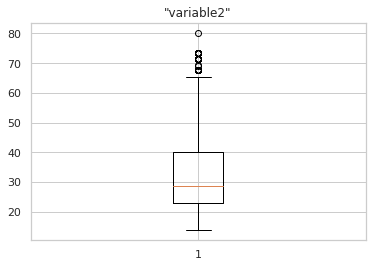

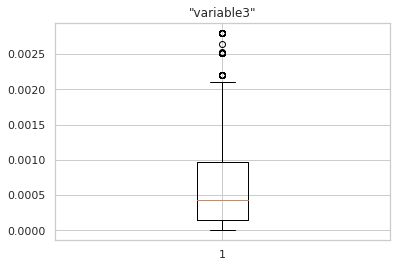

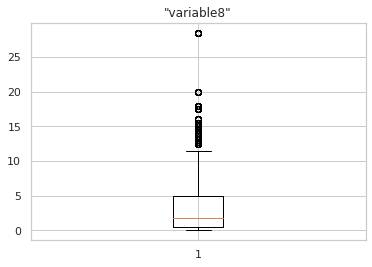

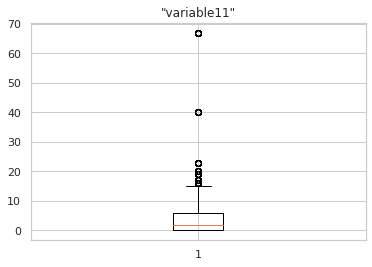

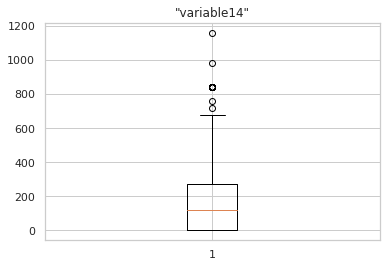

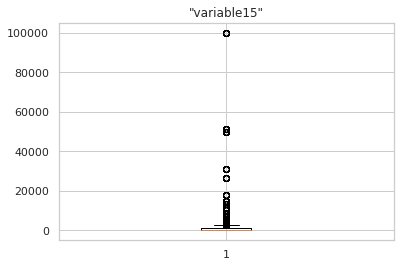

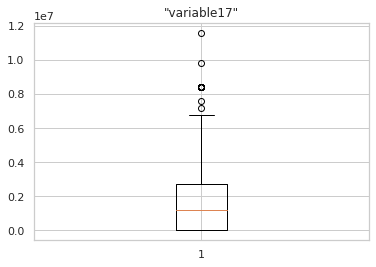

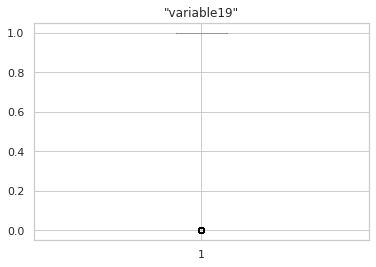

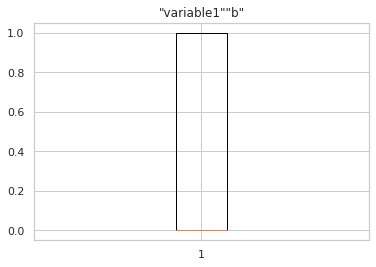

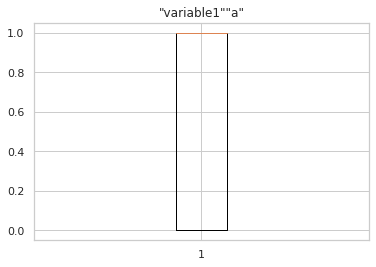

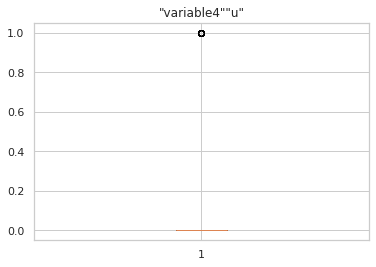

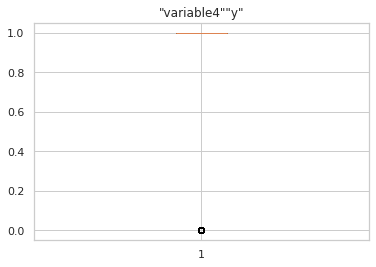

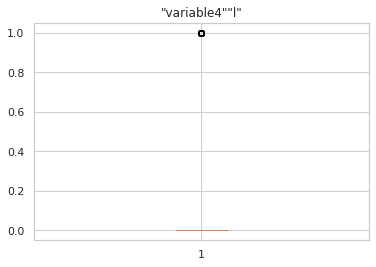

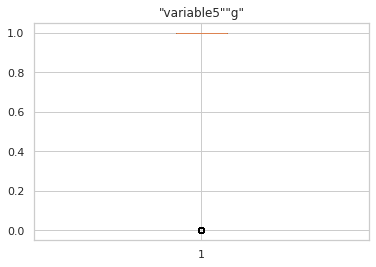

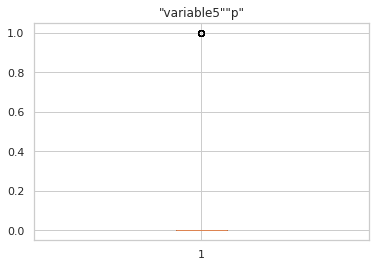

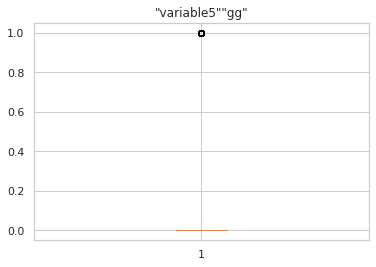

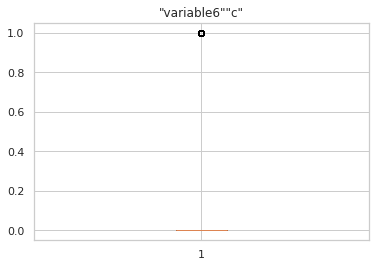

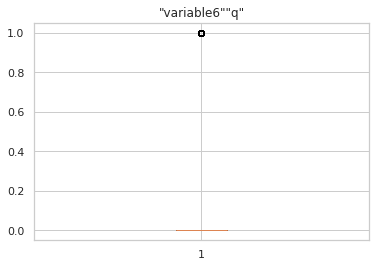

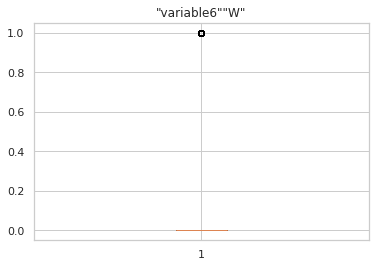

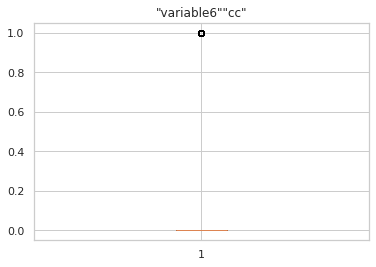

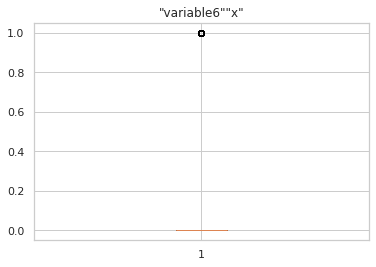

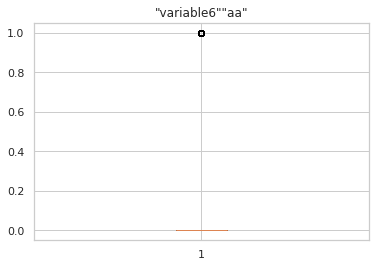

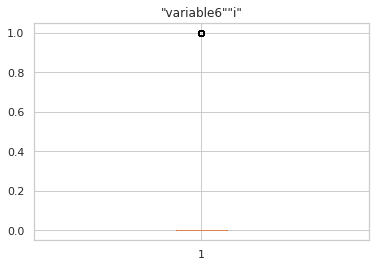

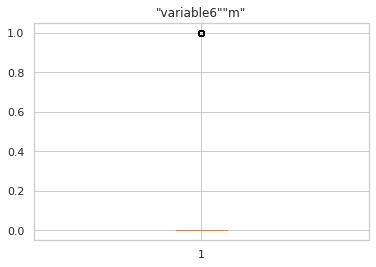

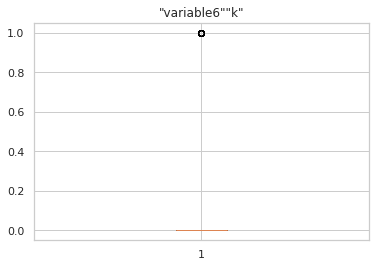

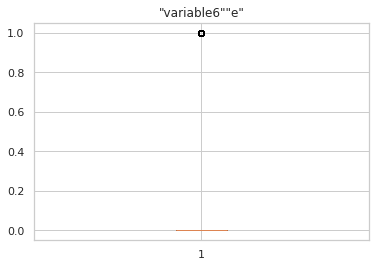

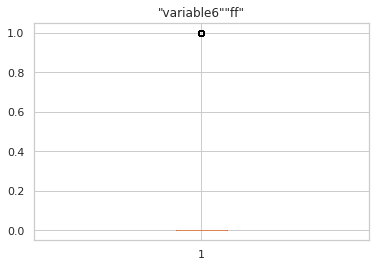

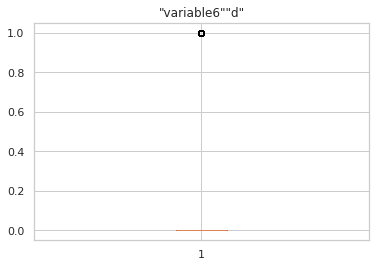

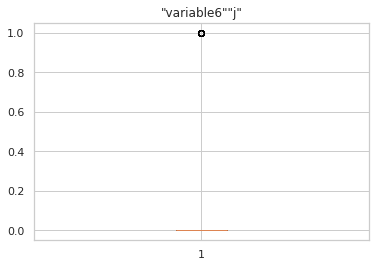

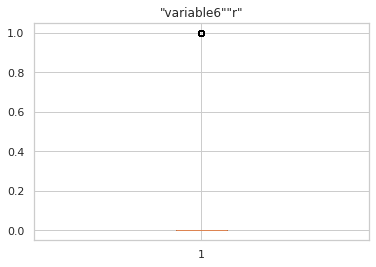

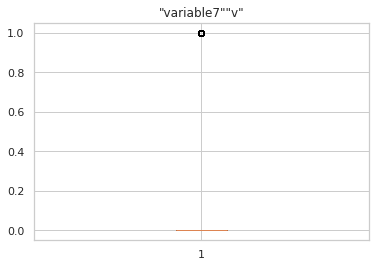

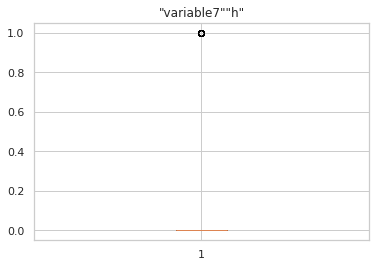

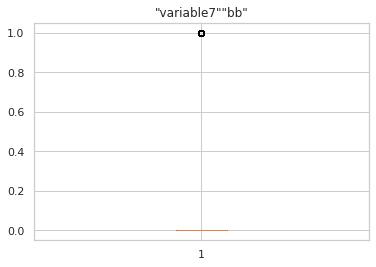

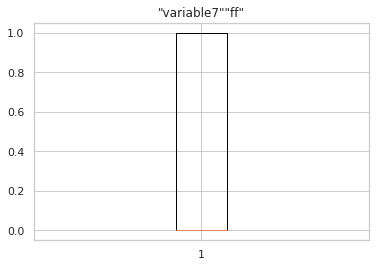

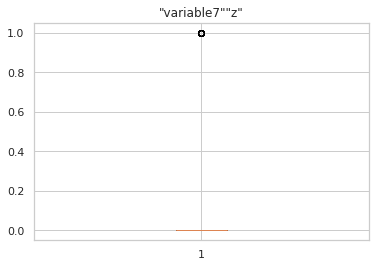

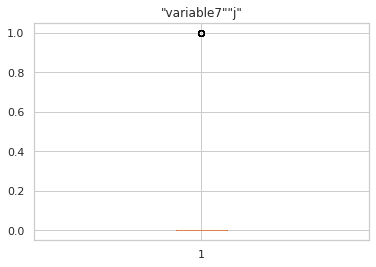

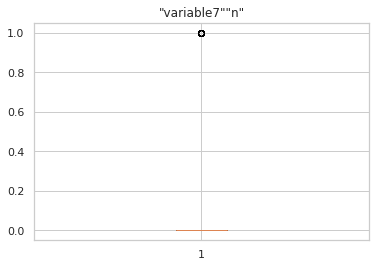

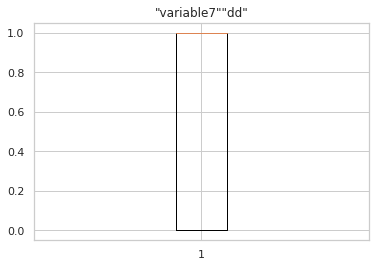

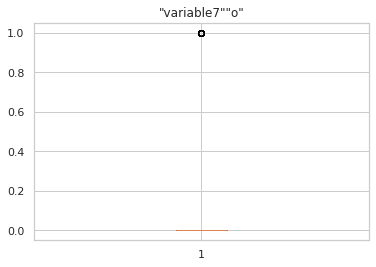

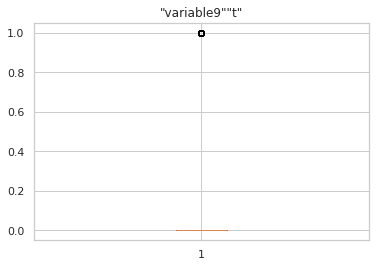

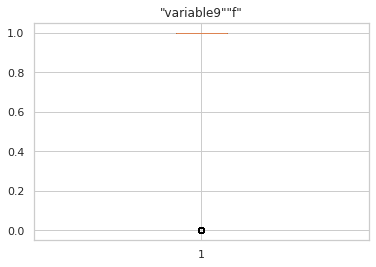

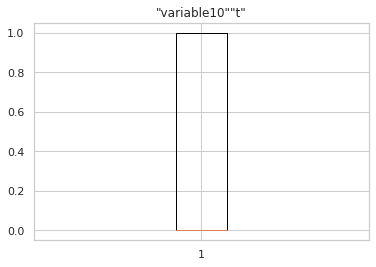

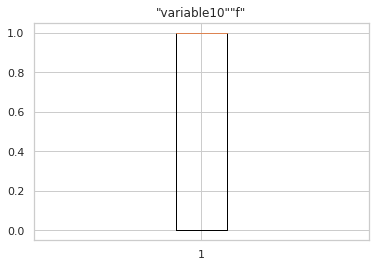

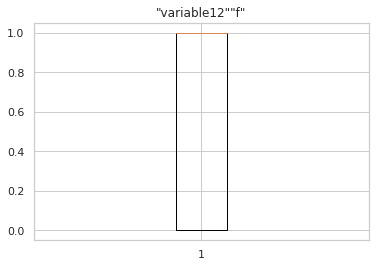

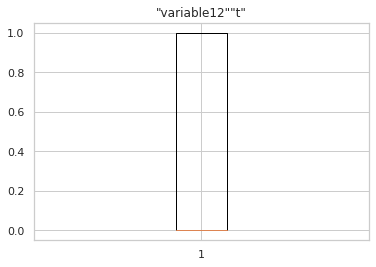

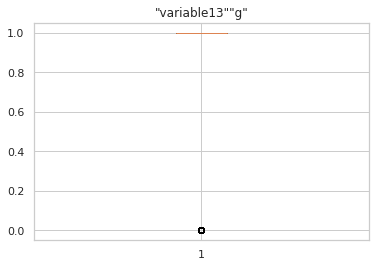

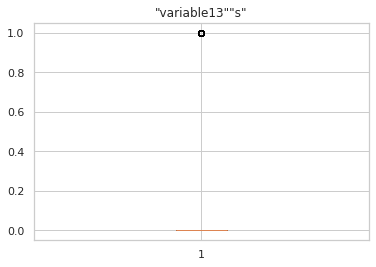

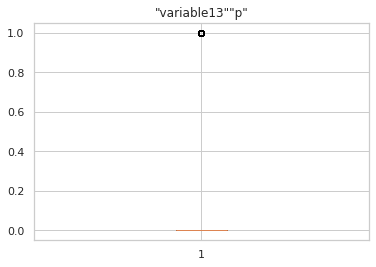

In [33]:
for col in train_df.columns:
  fig1, ax1 = plt.subplots()
  ax1.set_title(col)
  ax1.boxplot(train_df[col])

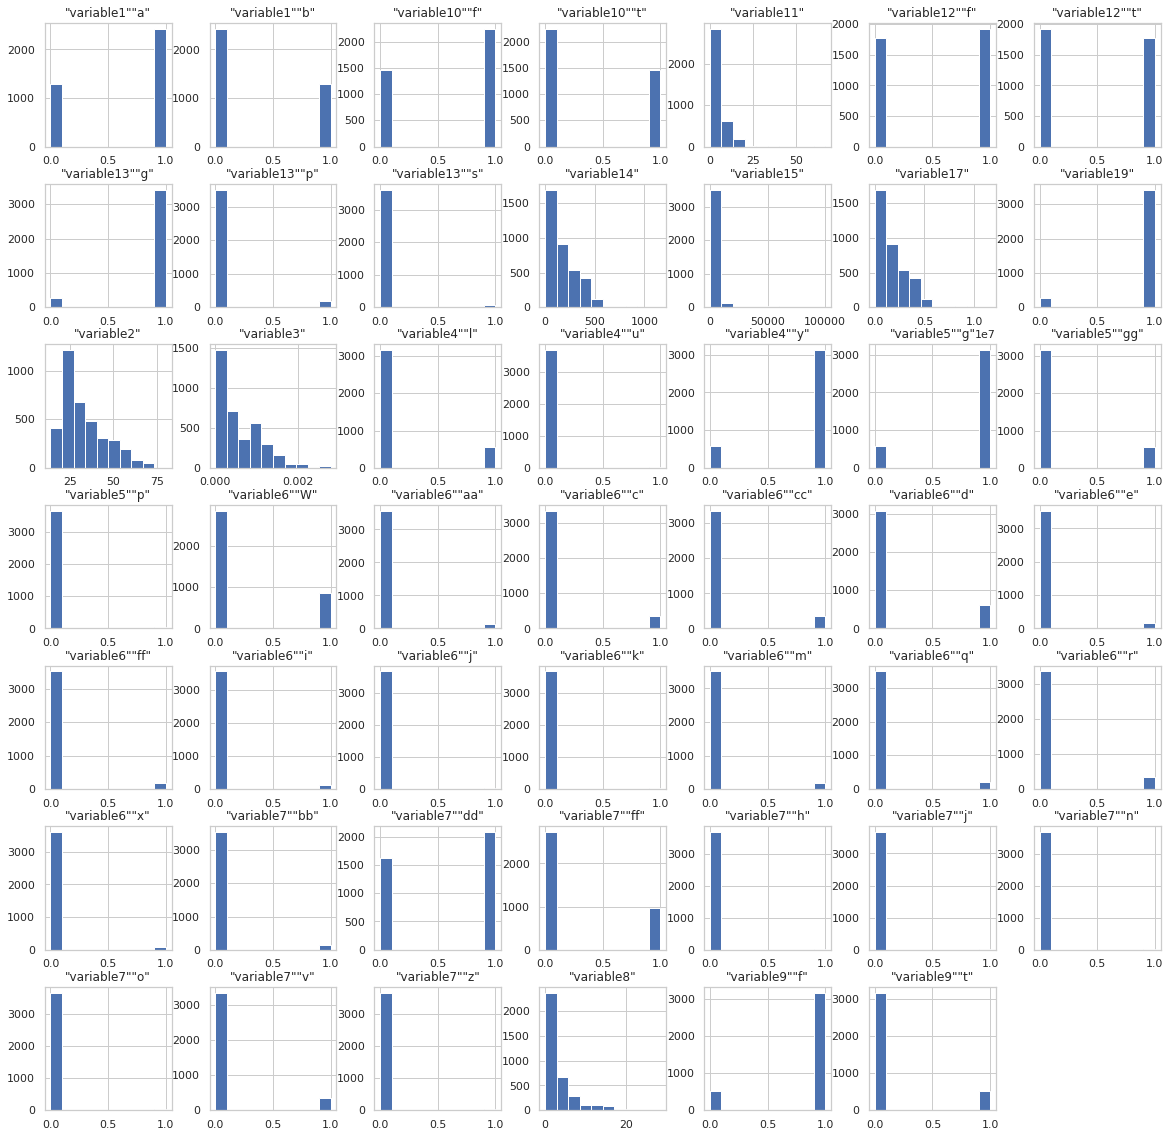

In [35]:
hist = train_df.hist(bins=10,figsize=[20,20])

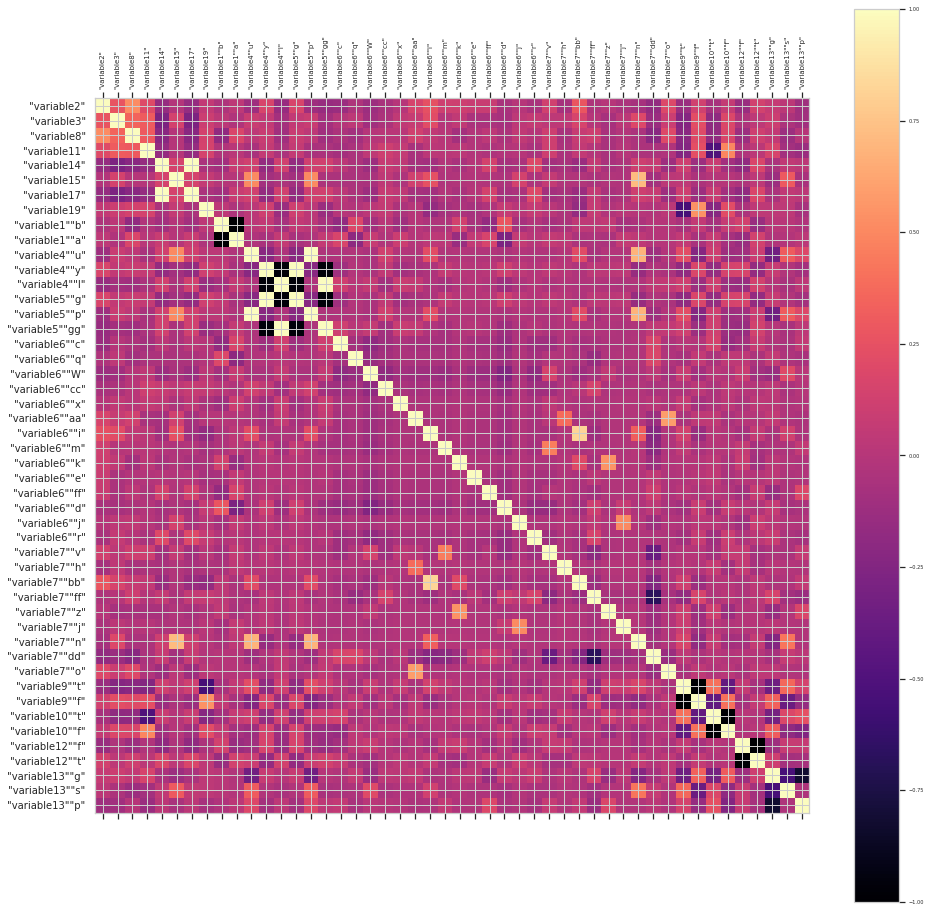

In [37]:
def corrMat(dff):
    f = plt.figure(figsize=(16,16))
    plt.matshow(dff.corr(), fignum=f.number,cmap='magma')
    plt.xticks(range(dff.shape[1]), dff.columns, fontsize=7, rotation='vertical')
    plt.yticks(range(dff.shape[1]), dff.columns, fontsize=10)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=5)
corrMat(train_df)

In [ ]:
# As we can see there is no pair of features depending on each other or correlated so we can't reduce our features
# Due to lack of data and large number of features we got this accuracy